# tracking clouds - test & show

Define clouds, basic tools


### Nov 2020, JAH

### About Clouds


   * Select low-threshold Esmeralda hits, usa a variable as 'energy' i.e raw-energy
   
   
   * make cells ('voxels') in the space (10., 10., 2. ) mm (minimum cells)
   
   
   * compute the **gradient** between adjacent cells
   
   
   * associate cells into a **top/node** using the grandient
   
   
   * compute the gradient (**link**) for cells that are in the border of two nodes with respect the cells in the other node.
   
       * Select as **pass** the cells that match gradients, and the one pass with the largest energy
       
       * Using a pass, one can connect to nodes using the pass and the gradient.
   
   
   * Make *rangers* connecting nodes via passes, starting from the most energetic node and the most energetic pass.
   
       * avoid entering a node that it is already in the *ranger*. Avoid loops
   
   
   * Define the **ranger** as the cells in the path between nodes via passes. 
   
       * Associate the energy to the cells in the paths
   
   

### Tasks:

   * MC comparison
   
       * ranger
       
       * blob/nodes?
   
   
   * Energy resolution?
   
       * hits-isolated (data!)
   
   
   * Relation with Paolina [?]
   
       * Can we identify blobs
   
   
   * Relation with Beersheba [?]



In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

#to_df = pd.DataFrame.from_records

In [4]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.histos       as histos

#import bes.bes           as bes
#import bes.clouds        as clouds
#import bes.chits         as chits
#import bes.display       as nplay
import clouds        as clouds
import pltclouds     as pltclouds

In [5]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Mon Apr 19 17:06:36 2021


### load data

In [6]:
def get_chits_filename(run_number, label = 'ds_rough'):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/chits_{label}_{run_number}.h5'
    return filename


In [7]:
run_number = 8182
fname = get_chits_filename(run_number)
print(fname)
ddh    = pd.read_hdf(fname, 'CHITs.lowTh')
dde    = ddh.groupby('event')
events = np.unique(ddh.event.values)
print('total events ', len(events))

/home/hernando/data/NEW/chits_ds_rough_8182.h5


FileNotFoundError: File /home/hernando/data/NEW/chits_ds_rough_8182.h5 does not exist

In [7]:
#ddh

In [8]:
def draw_event(event):
    hh    = dde.get_group(event)
    x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
    nplay.event(x, y, z, erec, alpha = 0.2, cmap = 'jet');

## Load Event

In [9]:
#xevents = [1241463, 981141, 2300475, 543247]
#xevents = [1002903, 928609, 1057115, 226373]
#xevents = 1883117, 1368698 # one-electron
#xevents = 2617619 # multiple-connections!
#xevents = 1477362 # double-electrons
#xevents = 2141627 # problem with the link! ISSUE
#event   = 1645993, 1807203, 756596, 39402 # A nice track
# event_track   = 872975, 1855276, 2017780
# events_2e     =  313053,  1306119, 2108616, 1228702
# events_1e     =  2451063
# event_loops   =  285947
# event_brokend = 39402
#event_satelites = [285627, 2141627]

event number  1679916
total energy  1.643 MeV
z-width 97.544 mm


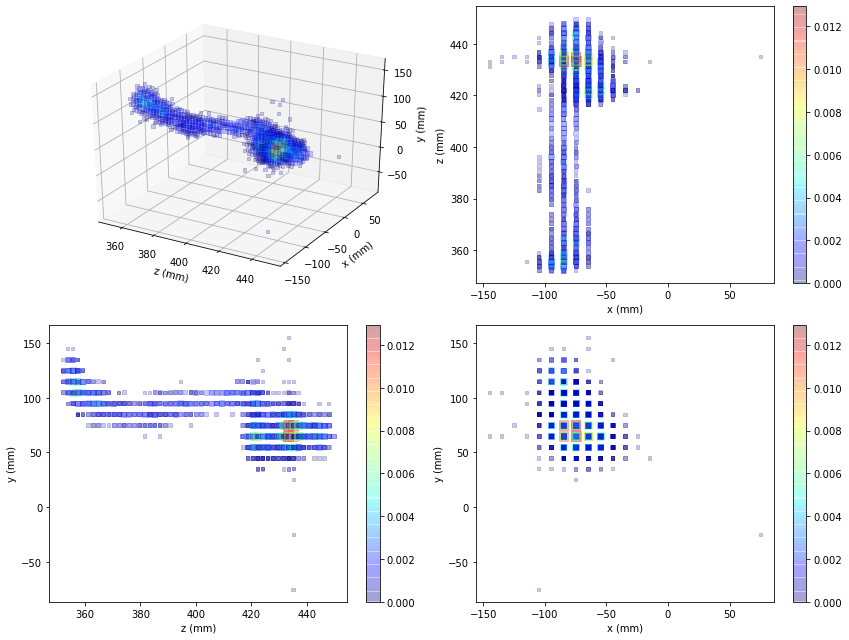

In [25]:
events  = np.unique(ddh.event.values)
ievent   = np.random.choice(events, 1)[0]

#ievent = 39402

print('event number ', ievent)
evt    = ddh.groupby('event').get_group(ievent)
print('total energy {:6.3f}'.format(np.sum(evt.Ec)), 'MeV')
dz     = np.max(evt.Z) - np.min(evt.Z)
print('z-width {:6.3f}'.format(dz), 'mm')

draw_event(ievent)

## Load the event

In [26]:
#event = 543247
hh    = dde.get_group(ievent)
x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
xstep, ystep, zstep = 10., 10., 2.

## Run clouds

In [27]:
ndim    = 3
coors   = (x, y, z)
steps   = (xstep, ystep, zstep)
weights = eraw

dfclouds = clouds.clouds(coors, steps, weights)
#dfclouds

## Draw clouds

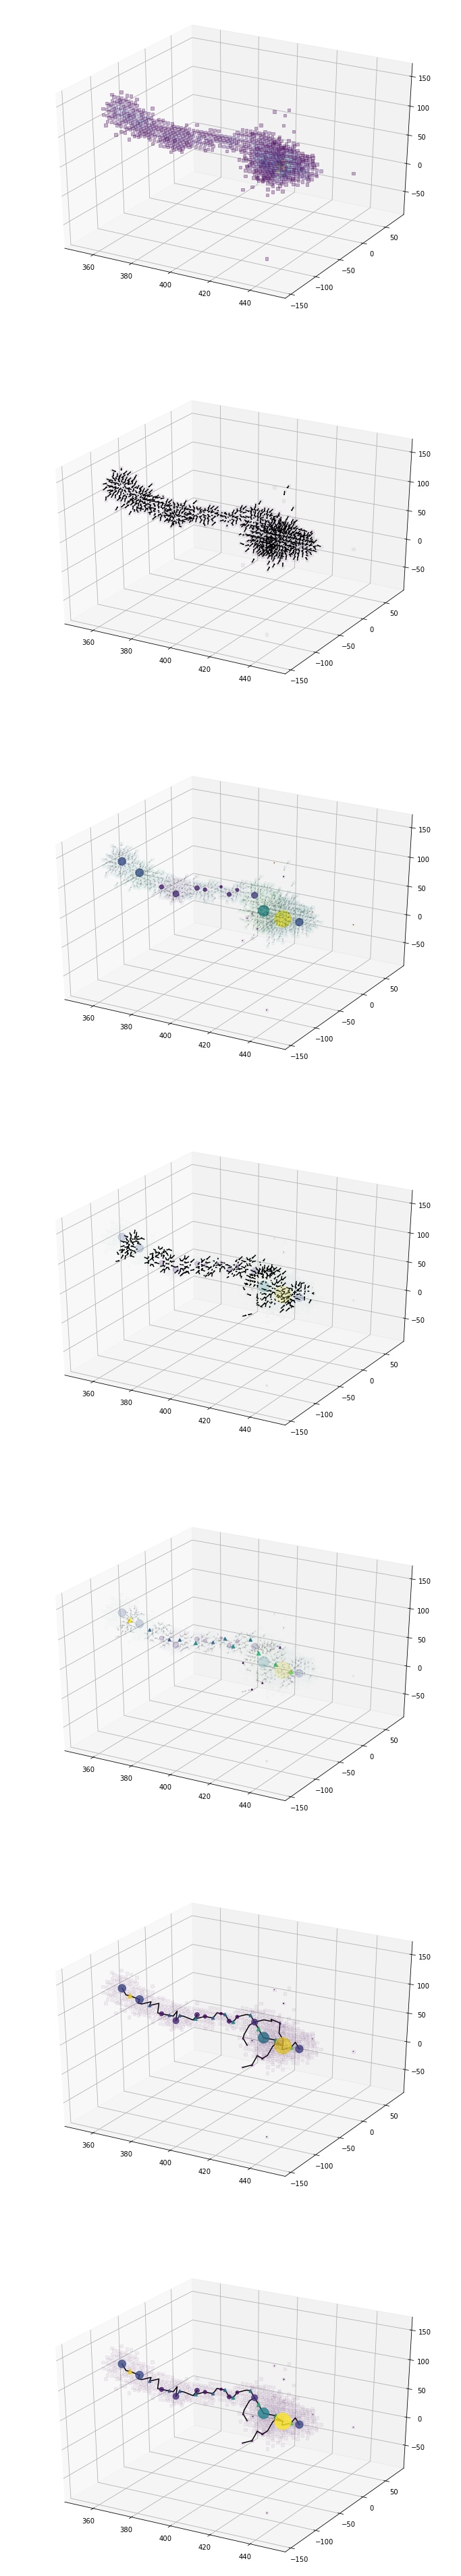

In [28]:
pltclouds.dcloud_steps(dfclouds, ndim, scale = 0.004, xaxis = 2)

In [29]:
draw, plots = pltclouds.get_draw_clouds(dfclouds)
print(plots)

{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': False, 'rangers': True}


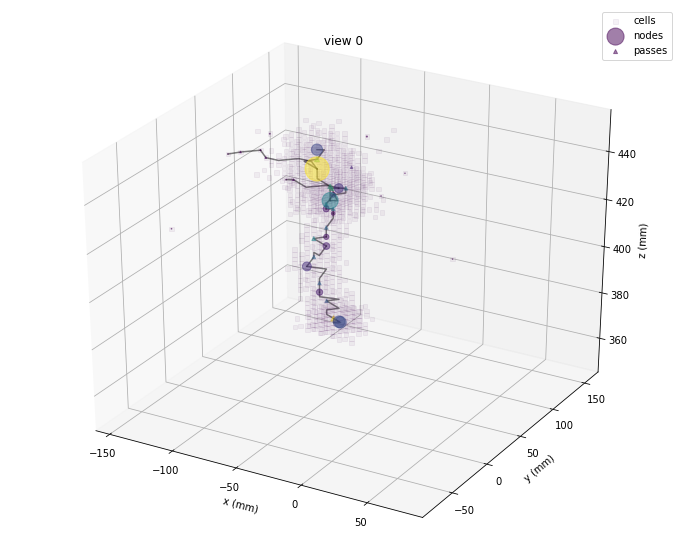

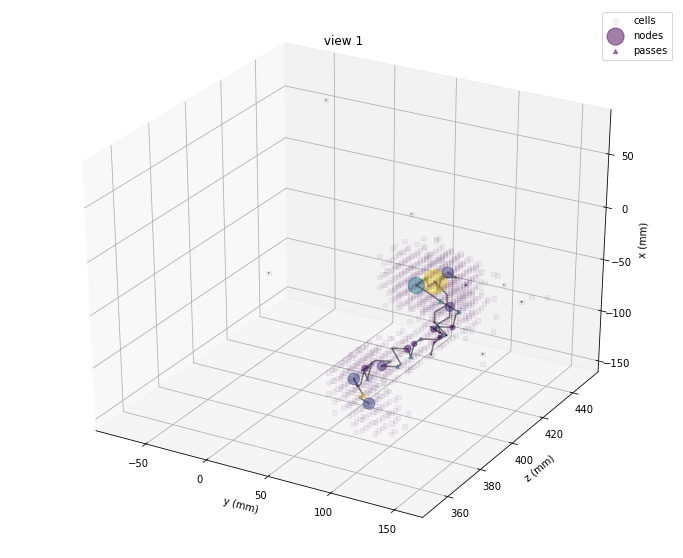

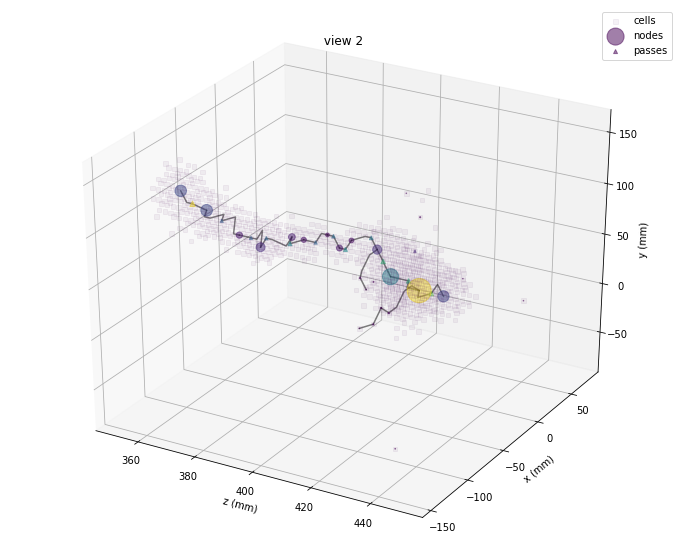

In [30]:
plots['passes'] = True
for view in range(3): draw(plots, scale = 0.004, xaxis = view)